This documment summarized the analysis of the New York City Subway Dataset. It was also a part of final project submission for Project 2 of the "Introduction for Data Science", Udacity Data Analyst Nanodegree Program.


## Analyzing the New York City Subway Dataset

### Load the data

In [1]:
import os
os.getcwd()

'/Users/thuy/Documents/Data-Science'

In [2]:
ls

Analyzing the NYC Subway Dataset.ipynb          baseball_stats.csv
Final_Analayzing_NYC_Subway_Dataset.ipynb       hr_by_team_year_sf_la.csv
P2_Wrangling_Subway_Data/                       hr_year.csv
Problem set 3.ipynb                             lesson01.ipynb
Project4_all_functions.ipynb                    lesson3_Data_analysis.ipynb
README.md                                       lesson4_visualization.ipynb
Summited_Analayzing_NYC_Subway_Dataset.ipynb    loading_wrangling_data_lesson02.ipynb
Updated-Analyzing the NYC Subway Dataset.ipynb  turnstile_data_master_with_weather (1).csv


###Summary of the data

In [3]:
import pandas as pd
#Read the data as Dataframe
turnstile_weather = pd.read_csv("turnstile_data_master_with_weather (1).csv")

#Number of variables
print 'Total variables:', len(list(turnstile_weather.columns.values))

#list of variables
print 'List of variables: ', list(turnstile_weather.columns.values)

#Statistics summary of the data
print 'Statistics summary'
turnstile_weather.describe()

Total variables: 22
List of variables:  ['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti', 'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog', 'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi', 'thunder']
Statistics summary


,Unnamed: 0,Hour,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
count,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951
mean,65975.000000,10.896158,1095.348478,886.890838,30.031894,57.241302,48.259013,29.892714,52.703526,29.965077,0.167100,0.334245,5.543065,56.169775,64.269729,71.769968,0.172276,0
std,38091.117022,6.892084,2337.015421,2008.604886,0.125689,8.770891,11.305312,0.146384,9.943590,0.130461,0.373066,0.471728,1.982441,6.338875,6.568289,7.627218,0.429005,0
min,0.000000,0.000000,0.000000,0.000000,29.740000,39.000000,22.000000,29.540000,31.000000,29.640000,0.000000,0.000000,1.000000,46.000000,55.000000,58.000000,0.000000,0
25%,32987.500000,5.000000,39.000000,32.000000,29.960000,50.000000,38.000000,29.840000,45.000000,29.910000,0.000000,0.000000,5.000000,52.000000,60.000000,65.000000,0.000000,0
50%,65975.000000,12.000000,279.000000,232.000000,30.030000,57.000000,51.000000,29.910000,54.000000,29.960000,0.000000,0.000000,5.000000,54.000000,63.000000,71.000000,0.000000,0
75%,98962.500000,17.000000,1109.000000,847.000000,30.100000,64.000000,55.000000,29.970000,60.000000,30.050000,0.000000,1.000000,6.000000,60.000000,68.000000,78.000000,0.100000,0
max,131950.000000,23.000000,51839.000000,45249.000000,30.310000,70.000000,66.000000,30.230000,68.000000,30.270000,1.000000,1.000000,12.000000,70.000000,78.000000,86.000000,2.180000,0


After having a quick glance at the data, I have some observations:

1. The data was colected from May 01 to May 30, 2011. So, the weather was started to increase but in pretty comfortable range from 50-75F. There was a Memorial Day on Monday May 30, 2011.

2. The mean and standard deviation of ridership per hour were 1095 and 2337, respectively. However the maximum data is 51839. There must be some extreme factors. 

From the above observations, I have some questions:

2. How many people travel with NYC subway systems at different conditions?

2. What are the conditions? Are they the weather, the time, the day, the location, etc?

3. How I can build a model to predict how many people will ride the NYC subway at the known conditions?

###Methodology

In order to answer my questions, I used the following methods:

1. Descriptive statistics to get information about the data.
2. Mann Whitney U Test to analyze the non-normal distributed data.
3. Data visualization to understand the pattern and relationship of variables.
4. Linear Regression with Scikit Learn Gradient descent using Scikit Learn.
5. Python as programing language.

###Section 0. References

1. http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

2. https://www.udacity.com/course/intro-to-data-science--ud359

3. Statistical Modeling: The Two Cultures (with comments and a rejoinder by the author) http://projecteuclid.org/euclid.ss/1009213726

4. https://discussions.udacity.com/c/nd002-p2-intro-to-data-science

5. https://weatherspark.com/averages/30722/5/New-York-United-States


###Section 1. Statistical Test

####1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?


I used two- tail Mann-Whitney U test to analyze the NYC subway data with the following hypotheses:

Null hypothesis Ho: The distribution of the number of entries is the same for rainny and non-rainy days 

Alternative hypothesis Ha: The distribution of the number of entries is statistically different for rainny and non-rainy days.

p-critical value was 0.05


####1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

Before performing a statistical test, it is useful to take a look at the data and determine what distribution the data follows. Specifically, the hourly entries in the NYC subway data.

Weather has a significant impact on what kinds of transportation you want to go. Rain was one of the most important weather factor. Therefore, I wanted to know the difference in ridership of the NYC subway on the days with rain and without rain. 


In [4]:
#Summary of ridership on rainy days
turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].describe()

count    44104.000000
mean      1105.446377
std       2370.527674
min          0.000000
25%         41.000000
50%        282.000000
75%       1103.250000
max      51839.000000
Name: ENTRIESn_hourly, dtype: float64

In [5]:
#Summary of ridership on no rainy days
turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].describe()

count    87847.000000
mean      1090.278780
std       2320.004938
min          0.000000
25%         38.000000
50%        278.000000
75%       1111.000000
max      43199.000000
Name: ENTRIESn_hourly, dtype: float64

From the above statistic, we could see that both data had similar means and standard deviations.

##### Distribution of NYC subway ridership on the days with rain and without rain

####Distribution of ridership

(0, 15000)

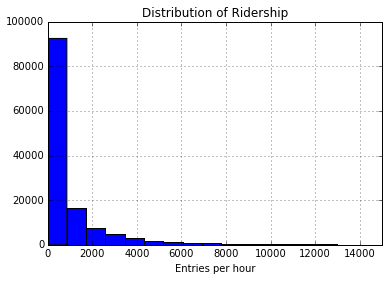

In [33]:

turnstile_weather['ENTRIESn_hourly'].hist(bins = 60)
plt.title('Distribution of Ridership')
plt.xlabel('Entries per hour')
plt.xlim(0,15000)

(0, 60000)

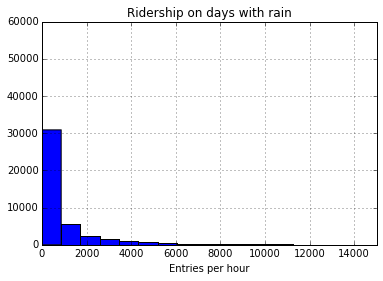

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Rain
turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].hist(bins = 60)
plt.title('Ridership on days with rain')
plt.xlabel('Entries per hour')
plt.xlim(0,15000)
plt.ylim(0, 60000)

(0, 15000)

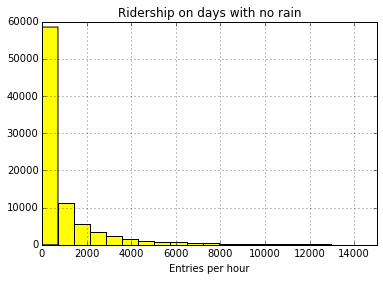

In [7]:
# No rain
turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].hist(color = "yellow", bins = 60)
plt.title('Ridership on days with no rain')
plt.xlabel('Entries per hour')
plt.xlim(0,15000)

Both of the data have similar shapes and were not normally distributed.

The statistically summary and distribution results showed that both data had similar means and standard deviations and were not normally distributed. Therefore, T-test was not an option. Since we had two groups of data and numbers of the data were more than 20, we could use Mann Whitney U-test to compare their distributions. We used two-tail test since we did not have any data supporting which group had larger mean.

####1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

#####Mann Whitney U-test

In [8]:
import numpy as np
import scipy
import scipy.stats
import pandas

# Consume turnstile_weather dataframe
# Return mean of entries with rain, mean of enteries without rain
# Return Mann_Whitney U-statistic and p value 

def mann_whitney_plus_means(turnstile_weather):
    with_rain_mean = turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].mean()
    without_rain_mean = turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].mean()
    U,p = scipy.stats.mannwhitneyu(turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'], turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'])
    print 'P value =', p*2 # the mannwhitenyu returned one-tail p value
    print 'Mean on rainy days =', with_rain_mean
    print 'Mean on nonrainy days=', without_rain_mean
    return with_rain_mean, without_rain_mean, U, p

In [9]:
mann_whitney_plus_means(turnstile_weather)

P value = 0.049999825587
Mean on rainy days = 1105.44637675
Mean on nonrainy days= 1090.27878015


(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.024999912793489721)

####1.4 What is the significance and interpretation of these results?

P value of 0.049 was less than p-critical value of 0.05. Therefore, we could reject the null hypothesis and conclude that the distribution of the number of entries is statistically different for rainny and non-rainy days.


###Section 2 and 3. Visualization and Linear Regression

#### 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
OLS using Statsmodels or Scikit Learn
Gradient descent using Scikit Learn
Or something different?


I used both OLS using Statsmodels and Scikit Learn Gradient descent using Sciket Learn for the problem set 2-4. I found that OLS run really slow because of the large dimension of the dataset. Therefore, I used only gradient descent for the project.

#### Visualization

Before choosing the input variables, it is useful to look at the pattern of the data. 

Beside rain which was investigated in section 1, time and date might has impacts on what how people would like to transport. Let's explore how the factors effected on the ridership.


#####UNIT

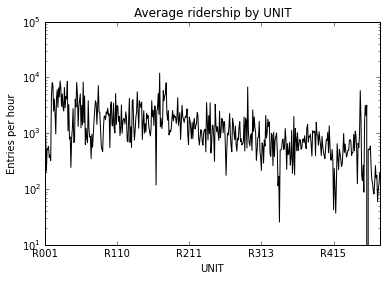

In [10]:
turnstile_weather.groupby(['UNIT'])['ENTRIESn_hourly'].mean().plot(color = "black")
plt.yscale('log', nonposy='clip')
plt.title('Average ridership by UNIT')
plt.xlabel('UNIT')
plt.ylabel('Entries per hour')

We could see from the plot that the average ridership was varied with log scale by UNIT. It suggested that the location of the station (UNIT) has impacted on ridership.

####Time of day

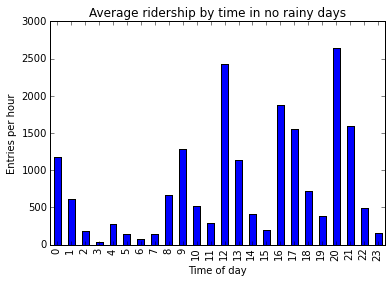

In [11]:

turnstile_weather[turnstile_weather.rain == 0].groupby(["Hour"])["ENTRIESn_hourly"].mean().plot(kind = 'bar')
plt.title('Average ridership by time in no rainy days')
plt.xlabel('Time of day')
plt.ylabel('Entries per hour')

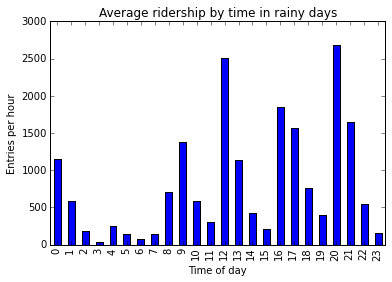

In [12]:
turnstile_weather[turnstile_weather.rain == 1].groupby(["Hour"])["ENTRIESn_hourly"].mean().plot(kind = 'bar')
plt.title('Average ridership by time in rainy days')
plt.xlabel('Time of day')
plt.ylabel('Entries per hour')

We could see that number of ridership changed with different times of day. They had the same patterns for both rainy and no rainy days. The most busiest hours were 8-9am, noon to 1pm, 4-5pm, 7-8pm and midnight. It was expected that 8-9am and 4-5pm were the commute time for working people. However it was interesting that noon time, late evening and midnight were also busy. It could be New York is a lively city with many activities at lunch or late night.

####Day of week

In [13]:
# Add day of the week DAY variable to the dataframe
import datetime as dt
turnstile_weather['DAY'] = pandas.Series(turnstile_weather['DATEn'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').weekday()), index=turnstile_weather.index)
turnstile_weather.is_copy = False

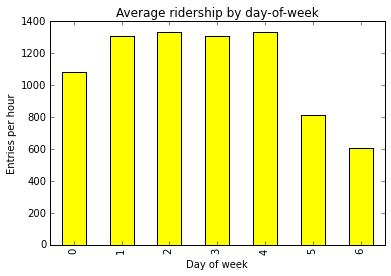

In [14]:
turnstile_weather.groupby(['DAY'])['ENTRIESn_hourly'].mean().plot(kind = 'bar',color = "yellow")
plt.title('Average ridership by day-of-week')
plt.xlabel('Day of week')
plt.ylabel('Entries per hour')

In [15]:
# Add day of the week DAY name variable to the dataframe
import datetime as dt
turnstile_weather['Day_of_week'] = pandas.Series(turnstile_weather['DATEn'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').strftime('%a')), index=turnstile_weather.index)
turnstile_weather.is_copy = False

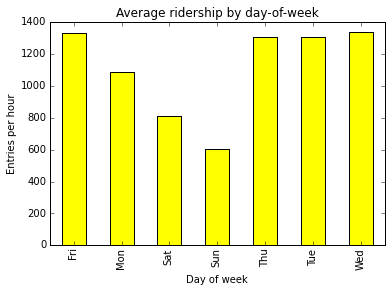

In [16]:
# ridership by day-of-week

turnstile_weather.groupby(['Day_of_week'])['ENTRIESn_hourly'].mean().plot(kind = 'bar',color = "yellow")
plt.title('Average ridership by day-of-week')
plt.xlabel('Day of week')
plt.ylabel('Entries per hour')

In [17]:
turnstile_weather.groupby(['Day_of_week'])['ENTRIESn_hourly'].mean()

Day_of_week
Fri    1333.800773
Mon    1084.888769
Sat     809.925317
Sun     604.620120
Thu    1305.176382
Tue    1307.073259
Wed    1335.901803
Name: ENTRIESn_hourly, dtype: float64

As expected the most busiest day during weekday with average entries per hour were around 1100 to 1300. It was less busier were on weekend. 

####Fog

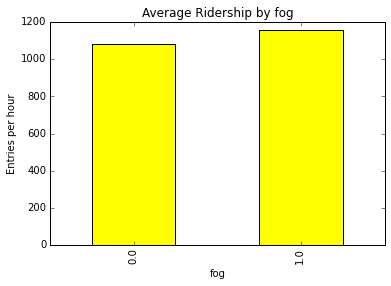

In [22]:
#fog
turnstile_weather.groupby(['fog'])['ENTRIESn_hourly'].mean().plot(kind = 'bar', color = "yellow")
plt.title('Average Ridership by fog')
plt.xlabel('fog')
plt.ylabel('Entries per hour')

Fog had impact on the ridership since we could notice the average entries per hour on  on the foggy days was higher than non foggy days. 

#### Precipitation

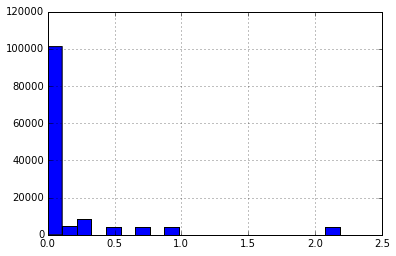

In [57]:
turnstile_weather['precipi'].hist(bins = 20)

The distribution of the data showed that most of precipitation were less than 0.1 which means very light to no rain (http://usatoday30.usatoday.com/weather/wds8.htm). 

(400, 1400)

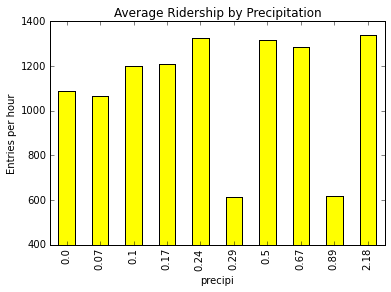

In [82]:
#precipitation
turnstile_weather.groupby(['precipi'])['ENTRIESn_hourly'].mean().plot(kind = 'bar', color = "yellow")
plt.title('Average Ridership by Precipitation')
plt.xlabel('precipi')
plt.ylabel('Entries per hour')
plt.ylim(400,1400)

Precipitation did not have a clear impact on the ridership. It looked like the as rain heavier than 0.17 there more people riding the subway except on days with precipitation of 0.29 and 0.89. Let us explore why.

In [77]:
# day with 0.29 precipi
turnstile_weather[turnstile_weather['precipi'] == 0.29].DAY.describe()

count    4350
mean        0
std         0
min         0
25%         0
50%         0
75%         0
max         0
Name: DAY, dtype: float64

In [78]:
turnstile_weather[turnstile_weather['precipi'] == 0.29].DATEn.head(1)

127601    2011-05-30
Name: DATEn, dtype: object

The day that had precipitation of 0.29 (heavy rain) was May 30, 2011. It was Memorial Day. Therefore, it could be explained that there was less ridership on that day even though it rained heavy.

In [79]:
# day with 0.29 precipi
turnstile_weather[turnstile_weather['precipi'] == 0.89].DAY.describe()

count    4333
mean        6
std         0
min         6
25%         6
50%         6
75%         6
max         6
Name: DAY, dtype: float64

In [80]:
turnstile_weather[turnstile_weather['precipi'] == 0.89].DATEn.head(1)

61640    2011-05-15
Name: DATEn, dtype: object

The day that had precipitation of 0.89 was  May 15 which also was a Sunday. Therefore, it could be explained that there was less ridership on that day even though it rained very heavy.

From all above exploration about precipitation data, we could conclude that precipitation did impact on ridership except on holidays or weekends.

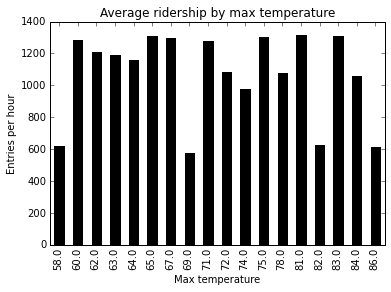

In [83]:
#maxtempi
turnstile_weather[['maxtempi','ENTRIESn_hourly']].groupby(['maxtempi'])['ENTRIESn_hourly'].mean().plot(kind = 'bar', color = "black")
plt.title('Average ridership by max temperature')
plt.xlabel('Max temperature')
plt.ylabel('Entries per hour')

The temperature ranged from 58 to 86F while the average ridership changed from around 600 to 1300 toentries per hour. Above 80F may be a bit hot but it seems like the temparature did have clear affect on the ridership. Let us explore why

In [95]:
#days with 82F
turnstile_weather[turnstile_weather['maxtempi']==82].DATEn.describe()

count           4346
unique             1
top       2011-05-29
freq            4346
Name: DATEn, dtype: object

In [97]:
# days with 86F
turnstile_weather[turnstile_weather['maxtempi']==86].DATEn.describe()

count           4350
unique             1
top       2011-05-30
freq            4350
Name: DATEn, dtype: object

Both days with high temperature but less ridership were on Memorial holiday weekend (May 29 and May 30). 

#### Mean dew point

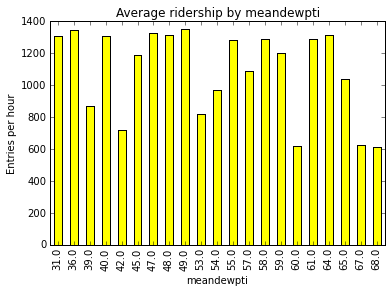

In [20]:
#meandewpti
turnstile_weather[['meandewpti','ENTRIESn_hourly']].groupby(['meandewpti'])['ENTRIESn_hourly'].mean().plot(kind = 'bar',color = "yellow")
plt.title('Average ridership by meandewpti')
plt.xlabel('meandewpti')
plt.ylabel('Entries per hour')

The mean dew point which indicates the amount of the moisture in the air had no relationship with the average ridership.

#### Mean wind speed.

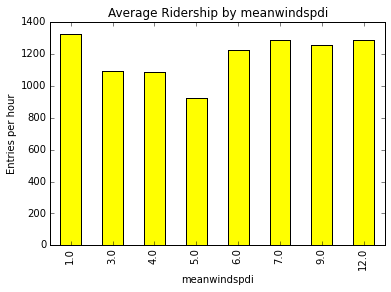

In [99]:
#meanwindspdi
turnstile_weather.groupby(['meanwindspdi'])['ENTRIESn_hourly'].mean().plot(kind = 'bar', color = "yellow")
plt.title('Average Ridership by meanwindspdi')
plt.xlabel('meanwindspdi')
plt.ylabel('Entries per hour')

#### Mean pressure

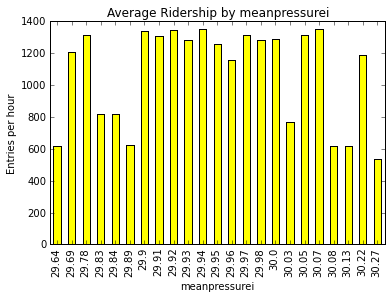

In [104]:
#meanpressurei
turnstile_weather.groupby(['meanpressurei'])['ENTRIESn_hourly'].mean().plot(kind = 'bar', color = "yellow")
plt.title('Average Ridership by meanpressurei')
plt.xlabel('meanpressurei')
plt.ylabel('Entries per hour')

There was no relationship between mean pressure and average ridership.

####2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

After exploring the variables, I used 'rain', 'precipi', 'fog' and 'maxtempi' variables as my input because those variables affected on ridership. To avoid the multicollinearity, I run my model with add a variable at one time to see if they are highly linearly related.

The 'UNIT', 'Hour' and 'day_of_week' were important variable but 'UNIT' was a caterogies data and 'day_of_week' and 'Hour' are scaling data. Therefore, I used them as dummy variables as part of my features. 

There was a holiday on the data set which significant impact on the ridership. That was the Memorial holiday on May 30, 2015. 



In [105]:
input_variables = ['rain', 'precipi', 'fog', 'maxtempi'] 

####2.3 Why did you select these features in your model? 

I selected the features because the exploratory analysis suggested that weather, time and date had impacts on what how people would like to ride the subway. Therefore, variables such as rain, precipitation, temperature, foggy condition, time of the day and day of week were used as features for the model. 

In order to validate my assumptions, I also included and withdrawed the variables in my features and investigated how it increased or decreased my coefficients of determination (R2) value. The results showed that using rain, precipitation, temperature, time of the day and day of week get the best R2 value of 0.498. There was no clear evidence of multicollinearity among those variables. Therefore, I used all the four 'rain', 'precipi', 'fog' and 'maxtempi' as my non-dummy input features. Since the data was in a large range, I also used the subset with more than 10000 and 20000 number of entries per hour and found the R2 value of 0.61 and 0.76, respectively. The R2 value was also significant improved if I applied the model with only high traffic hours.

The code were showed below.


####2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

In [203]:
import numpy as np
import pandas
from sklearn.linear_model import SGDRegressor


def normalize_features(features):
    ''' 
    Returns the means and standard deviations of the given features, along with a normalized feature
    matrix.
    ''' 
    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features

def recover_params(means, std_devs, norm_intercept, norm_params):
    ''' 
    Recovers the weights for a linear model given parameters that were fitted using
    normalized features. Takes the means and standard deviations of the original
    features, along with the intercept and parameters computed using the normalized
    features, and returns the intercept and parameters that correspond to the original
    features.
    ''' 
    intercept = norm_intercept - np.sum(means * norm_params / std_devs)
    params = norm_params / std_devs
    return intercept, params

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    clf = SGDRegressor(n_iter = 60) # select iteration = 20 to improve R2
    intercept = clf.fit(features,values).intercept_
    params = clf.fit(features,values).coef_
    return intercept, params

def predictions(dataframe, input_val):
    
    features = dataframe[input_val]
    dummy_days = pandas.get_dummies(dataframe['DAY'], prefix='day')
    dummy_units =pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    dummy_hours = pandas.get_dummies(dataframe['Hour'], prefix='hour')
    days_units= pandas.concat([dummy_days, dummy_units, dummy_hours], axis=1)
    features = features.join(days_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression(normalized_features_array, values_array)
    
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    print "\nTotal parameters:", len(params)
    print "\nCoeffient values:"
    print input_val, ":", params[:len(input_val)]

    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    return predictions


In [123]:
def compute_r_squared(data, predictions):
    # Write a function that, given two input numpy arrays, 'data', and 'predictions,'
    # returns the coefficient of determination, R^2, for the model that produced 
    # predictions.
    
    difference_squared = map(lambda data, predictions: (data - predictions)**2, data, predictions)
    mean_data = np.mean(data)
    variance = map(lambda data: (data - mean_data)**2, data)
    r_squared = 1 - sum(difference_squared)/sum(variance)
    print "R_square value: ", r_squared

#### Prediction for the whole data

In [206]:
# With rain as input
input_rain = ['rain']
compute_r_squared(turnstile_weather['ENTRIESn_hourly'], predictions(turnstile_weather, input_rain))


Total parameters: 497

Coeffient values:
['rain'] : [-48.33055438]
R_square value:  0.485389851936


In [207]:
#exclude memorial day
weather_subset = turnstile_weather[turnstile_weather['DATEn']!= '2011-05-30']
weather_subset.tail()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder,DAY,Day_of_week
127596,127596,R552,2011-05-29,23:17:36,23,REGULAR,58,472,30.14,69,...,0,0,5,67,75,82,0,0,6,Sun
127597,127597,R552,2011-05-29,23:23:06,23,REGULAR,60,659,30.14,69,...,0,0,5,67,75,82,0,0,6,Sun
127598,127598,R552,2011-05-29,23:44:21,23,REGULAR,41,36,30.14,69,...,0,0,5,67,75,82,0,0,6,Sun
127599,127599,R552,2011-05-29,23:51:44,23,REGULAR,1,0,30.14,69,...,0,0,5,67,75,82,0,0,6,Sun
127600,127600,R552,2011-05-29,23:58:04,23,REGULAR,147,257,30.14,69,...,0,0,5,67,75,82,0,0,6,Sun


In [224]:
input_rain = ['rain']
compute_r_squared(weather_subset['ENTRIESn_hourly'], predictions(weather_subset, input_rain))



Total parameters: 497

Coeffient values:
['rain'] : [ 14.1071621]
R_square value:  0.490354898733


Coefficent values for rain was positive (14.1) indicating that there was more ridership on the rainy days.

In [209]:
#With 2 variables as input
input_rain_pre = ['rain', 'precipi']
compute_r_squared(turnstile_weather['ENTRIESn_hourly'], predictions(turnstile_weather, input_rain_pre))


Total parameters: 498

Coeffient values:
['rain', 'precipi'] : [-83.97131092 -66.34953199]
R_square value:  0.481627870191


In [210]:
# rain and maxtempi as input
input_rain_tem = ['rain', 'maxtempi']
compute_r_squared(turnstile_weather['ENTRIESn_hourly'], predictions(turnstile_weather, input_rain_tem))


Total parameters: 498

Coeffient values:
['rain', 'maxtempi'] : [-77.12598242  -3.22958087]
R_square value:  0.482483560326


In [211]:
# With 3 variables as input
input_rain_fog_maxtemp = ['rain', 'fog', 'maxtempi']
compute_r_squared(turnstile_weather['ENTRIESn_hourly'], predictions(turnstile_weather, input_rain_fog_maxtemp))


Total parameters: 499

Coeffient values:
['rain', 'fog', 'maxtempi'] : [-162.05049727  124.46576406   -4.47781813]
R_square value:  0.487901327877


In [226]:
# With 4 variables as input
input_rain_fog_maxtemp = ['rain', 'precipi', 'fog', 'maxtempi']
compute_r_squared(turnstile_weather['ENTRIESn_hourly'], predictions(turnstile_weather, input_rain_fog_maxtemp))


Total parameters: 500

Coeffient values:
['rain', 'precipi', 'fog', 'maxtempi'] : [  -8.33401093  -82.67834431  116.81149498   -7.41896803]
R_square value:  0.476919165784


####Prediction for the low and high number of entries subsets

- Select some subsets with number of entries less than 1000, more than 1000, more than 10,000 and more than 20,000.

In [214]:
# Predict for Entries_hourly>1000:
input_val_1 = ['rain', 'precipi', 'fog', 'maxtempi']
more_8000_ridership = turnstile_weather[turnstile_weather['ENTRIESn_hourly']>=8000]
compute_r_squared(more_8000_ridership['ENTRIESn_hourly'], predictions(more_8000_ridership, input_val_1 ))


Total parameters: 147

Coeffient values:
['rain', 'precipi', 'fog', 'maxtempi'] : [ -44.68823138 -325.48970165  467.13765654  -39.38071704]
R_square value:  0.524256115258


In [215]:
# Predict for Entries_hourly<1000:
input_val_1 = ['rain', 'precipi', 'fog', 'maxtempi']
less_1000_ridership = turnstile_weather[turnstile_weather['ENTRIESn_hourly']<7000]
compute_r_squared(less_1000_ridership['ENTRIESn_hourly'], predictions(less_1000_ridership, input_val_1 ))


Total parameters: 500

Coeffient values:
['rain', 'precipi', 'fog', 'maxtempi'] : [-35.63118635 -60.82670426  56.44131613  -6.4030978 ]
R_square value:  0.53947284271


In [216]:
# Predict for Entries_hourly>10000:
input_val_1 = ['rain', 'precipi', 'fog', 'maxtempi']
more_10000_ridership = turnstile_weather[turnstile_weather['ENTRIESn_hourly']>=10000]
compute_r_squared(more_10000_ridership['ENTRIESn_hourly'], predictions(more_10000_ridership, input_val_1 ))


Total parameters: 117

Coeffient values:
['rain', 'precipi', 'fog', 'maxtempi'] : [-256.86048463 -500.42149491  536.96366823  -48.78804468]
R_square value:  0.606667693459


In [228]:
# Predict for Entries_hourly>20000:
input_val_1 = ['rain', 'precipi', 'fog', 'maxtempi']
more_20000_ridership = turnstile_weather[turnstile_weather['ENTRIESn_hourly']>=20000]
compute_r_squared(more_20000_ridership['ENTRIESn_hourly'], predictions(more_20000_ridership, input_val_1 ))


Total parameters: 45

Coeffient values:
['rain', 'precipi', 'fog', 'maxtempi'] : [ 565.43282546 -840.12769279  423.27709163  -41.74088486]
R_square value:  0.759967420351


R2 value was 0.48 if we used the whole data set. It means my model only could explain 49% of the original variability, and are left with 51% residual variability. Ideally, we would like to explain most if not all of the original variability. The R-square value was an indicator that I should improve my model by trying different ways of selecting of features.

If I only applied to a subset of high traffic data with more than 10000 or 20000 numbers of entries per hour, I got much better R2 value. It suggested that I could improve my model prediction by grouping the data into different subsets.

#### Predict for high traffic hours

- Remove the 'hour' as dummy features from the prediction function.
- Select some high traffic hours such as 8pm and noon to see the change in predictions.

In [217]:

def predictions_traffic(dataframe, input_val):
    
    features = dataframe[input_val]
    dummy_days = pandas.get_dummies(dataframe['DAY'], prefix='day')
    dummy_units =pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    days_units= pandas.concat([dummy_days, dummy_units], axis=1)
    features = features.join(days_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression(normalized_features_array, values_array)
    
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    print "\nTotal parameters:", len(params)
    print "\nCoeffient values:"
    print input_val, ":", params[:len(input_val)]

    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    return predictions


In [223]:
input_val_1 = ['rain','precipi', 'fog', 'maxtempi']
high_traffic_hours = turnstile_weather[turnstile_weather['Hour'] >= 20]
compute_r_squared(high_traffic_hours['ENTRIESn_hourly'], predictions_traffic(high_traffic_hours, input_val_1 ))


Total parameters: 473

Coeffient values:
['rain'] : [-86.82997788]
R_square value:  0.783432754749


In [220]:
input_val_1 = ['rain', 'precipi', 'fog', 'maxtempi']
noon_high_traffic_hours = turnstile_weather[turnstile_weather['Hour'] == 12]
compute_r_squared(high_traffic_hours['ENTRIESn_hourly'], predictions_traffic(high_traffic_hours, input_val_1 ))


Total parameters: 476

Coeffient values:
['rain', 'precipi', 'fog', 'maxtempi'] : [-162.31265614 -169.44500431   94.28244657  -14.51718898]
R_square value:  0.79619929971


###Section 4. Conclusion

The data analysis results showed that weather conditions (rain, precipitation, fog and maximum temperature), location of the subway station, time and date had impacts on the number of riders of NYC subway. Linear regression with gradient descent was implemented and got R2 value in range of 0.48 to 0.80 depending on the subsets of the data.

The results of Mann Whitney U Test (p = 0.049) showed that there was a statistical difference in the distribution of the number of riders when it is rain and when it is not rain. Further investigation in linear regression showed coefficient of 'rain' was -48. It looks like if it rains there are less people riding the NYC subway. However, we must be careful that there was a Memorial holiday during the collecting data time frame. When I excluded the day, the coefficient for 'rain' was 14 which means if it rains there are more people riding the subway. 

My R2 was also only 0.48 for the whole data set but significantly improved up to 0.8 depending on which subsets of data or just predicting for high traffic hours. It suggested that in order to get more precise conclusion, I need further investigation with different feature selections and statistical tests along with more background information about NYC subway and other related transportation data in NYC.




###Section 5. Reflection

The dataset contains only one month data of NYC subway. It was colected from May 01 to May 30, 2011. So, the weather may not be significant factor since it was in a short window of time. The mean and standard deviation of ridership per hour were 1095 and 2337, respectively. However the maximum data is 51839. There must be some extreme unknown factors which required further background research.

Mann Whitney U Test showed only the statistical difference in the distribution of the data but not more than that. Linear regression had a R2 value of 0.48 for the whole dataset and 0.76 for the subset of entries hourly more than 20000. The coefficient for 'rain' was negative suggesting there was some things more need to investigate before conclusion. 

I think the dataset is interesting and a bit challenge for the Introduction course if our goal is higher R2 value. I hope to improve my model with the Machine Learning course in the program. I also learned a lot while spending hours with the data, specially ask the right questions before digging too deep in the data: 1) How and when the data collected?; 2)If the model does not work well, is there any important background information that I miss?; 3) Learn about all the variables and what they are really mean to the output and also with other variables.

